<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Rotating_Wave_Approximation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

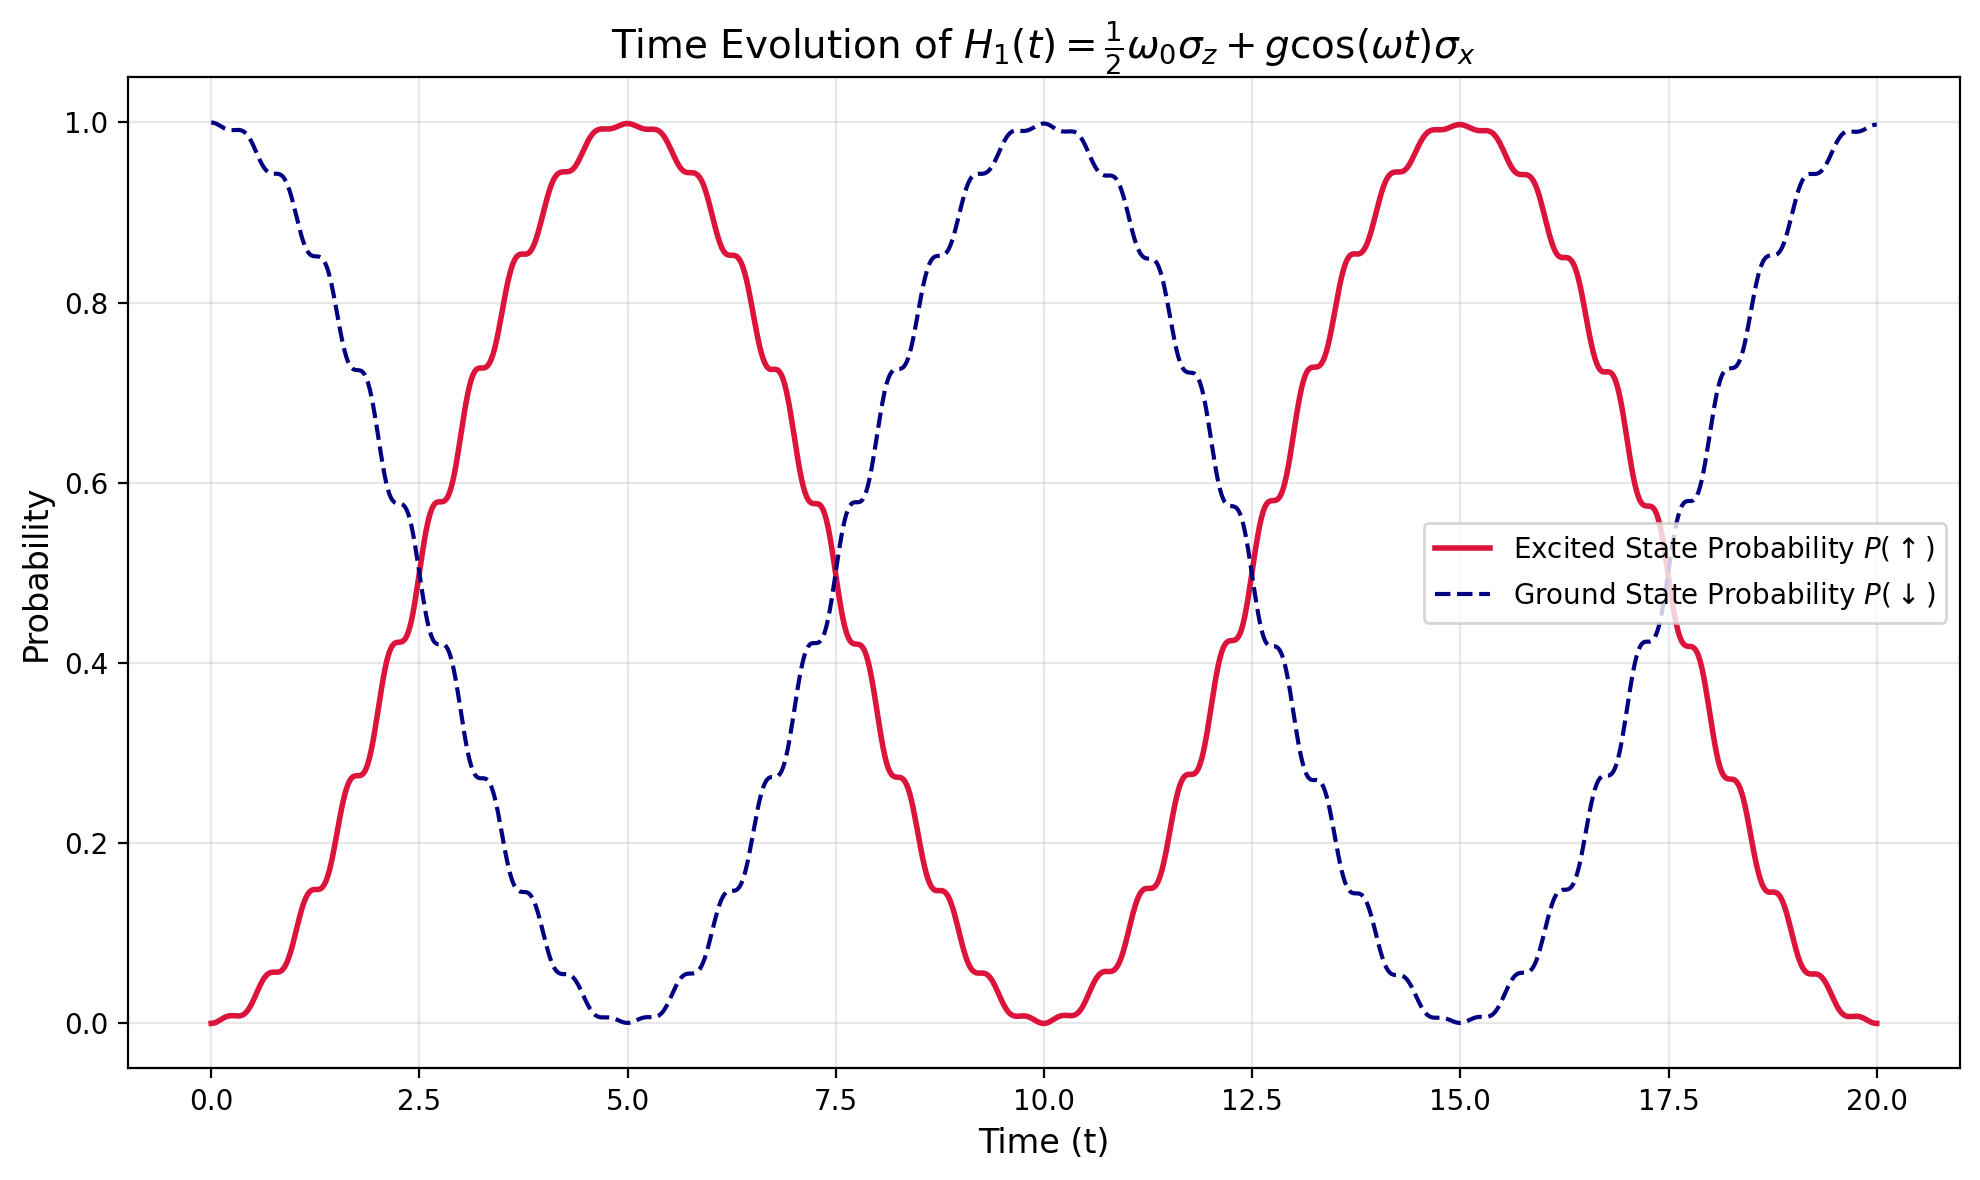

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rcParams['figure.dpi'] = 200

# --- 1. System Parameters ---
# We use normalized units where h_bar = 1
omega_0 = 2 * np.pi * 1.0   # Qubit transition frequency (1 Hz)
omega_drive = omega_0       # Driving frequency (Resonant condition: omega = omega_0)
g = 2 * np.pi * 0.1         # Coupling strength (Rabi frequency amplitude)

# --- 2. Define Pauli Matrices ---
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)

# --- 3. Define the Hamiltonian H(t) ---
def H(t):
    # H_1(t) = 0.5 * w0 * sz + g * cos(wt) * sx
    return 0.5 * omega_0 * sigma_z + g * np.cos(omega_drive * t) * sigma_x

# --- 4. Define the Schrödinger Equation ---
# d|psi>/dt = -i * H(t) * |psi>
def schrodinger_eqn(t, psi):
    # Calculate H at current time t
    H_t = H(t)
    # Matrix-vector multiplication
    d_psi = -1j * np.dot(H_t, psi)
    return d_psi

# --- 5. Solve the Evolution ---
# Initial State: Ground state |1> = [0, 1] (Spin Down)
psi_0 = np.array([0, 1], dtype=complex)

# Time range to simulate (e.g., 0 to 20 seconds)
# With g=0.1 Hz (approx), Rabi period is ~1/g.
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the differential equation
solution = solve_ivp(schrodinger_eqn, t_span, psi_0, t_eval=t_eval, vectorised=False)

# --- 6. Calculate Probabilities ---
# psi(t) is a 2xN array.
# Probability of Excited State (|0> = [1, 0]) is |amplitude_0|^2
prob_excited = np.abs(solution.y[0])**2
prob_ground = np.abs(solution.y[1])**2

# --- 7. Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(solution.t, prob_excited, label=r'Excited State Probability $P(\uparrow)$', color='crimson', linewidth=2)
plt.plot(solution.t, prob_ground, label=r'Ground State Probability $P(\downarrow)$', color='navy', linestyle='--')

plt.title(r'Time Evolution of $H_1(t) = \frac{1}{2}\omega_0 \sigma_z + g \cos(\omega t) \sigma_x$', fontsize=14)
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.ylim(-0.05, 1.05)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Time (t): This is the "range of values" being swept on the x-axis.